In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Analysis spectra IPG-n free/BaCl2

## Emission

In [12]:
pathe = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/emission/11_09_2024/IPG-1,4_emission.csv'
em_data = pd.read_csv(pathe, index_col = 'XYDATA')
em_data

,IPG-1_free 1e-6M,IPG-1_free 2e-5M,IPG-1_free 4e-5M,IPG-4_BaCl2 1e-6 at 50nm per min_5nm bw,IPG-4_BaCl2 1e-6,IPG-4_BaCl2 1p8e-5,IPG-4_free 1e-6 repetition speed 50nm per min,IPG-4_free_1e-6M_repetition,IPG-4_free_dissolved x2 repetition,IPG-4_free_dissolved x2,IPG-4_free_dissolved x10,IPG-4_free_orig_concent_repetition
XYDATA,,,,,,,,,,,,
525.0,5.75901,7.16022,6.55890,-4.85097,4.65346,13.06820,6.02949,6.22064,11.56560,13.94280,1.866600,3.826870
526.0,5.59622,7.36930,7.31300,-4.85322,5.37609,15.08450,7.54201,6.73990,14.70610,18.36710,2.420030,3.529990
527.0,4.71439,6.70004,5.26614,-6.45205,2.88997,15.94420,6.42219,6.25149,14.38560,20.75510,1.067460,2.682440
528.0,4.20711,6.31152,6.10849,-6.66239,3.33021,17.94250,6.08297,7.43961,19.64710,25.59940,1.268330,1.602850
529.0,4.45892,5.73498,5.53573,-7.75658,1.74001,20.63050,7.31774,7.69780,21.48210,31.15020,-0.617516,0.861245
...,...,...,...,...,...,...,...,...,...,...,...,...
696.0,4.27645,5.54423,5.35583,-6.07775,3.70776,7.16523,4.19615,3.99548,6.14094,5.58467,2.199330,2.757940
697.0,5.29368,5.06756,5.69151,-5.91361,4.41046,8.18646,4.36530,4.28150,6.54245,6.07561,2.404200,2.210600
698.0,4.66906,4.48473,5.68278,-6.12156,4.36648,7.35044,3.52974,4.50320,6.64485,5.18969,1.920670,2.687410


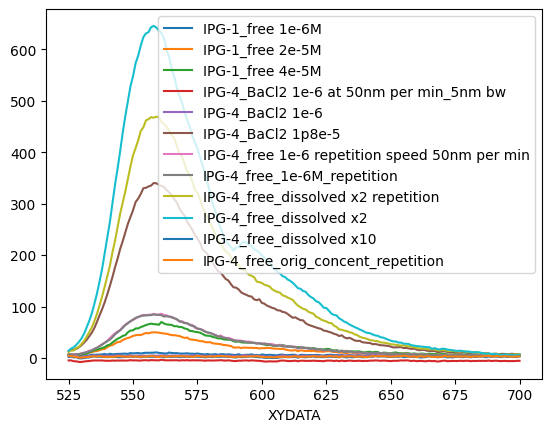

In [ ]:
for col in em_data:
    em_data[col].plot(label=col)
plt.legend()

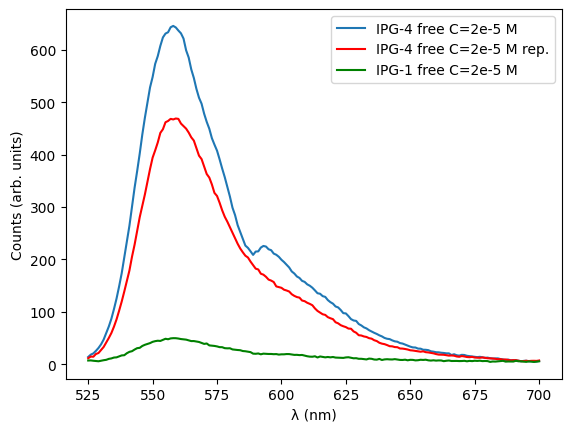

In [51]:
em_data['IPG-4_free_dissolved x2'].plot(label='IPG-4 free C=2e-5 M')
em_data['IPG-4_free_dissolved x2 repetition'].plot(color='r', label='IPG-4 free C=2e-5 M rep.')
em_data['IPG-1_free 2e-5M'].plot(color='g', label='IPG-1 free C=2e-5 M')
plt.gca().set(xlabel='λ (nm)', ylabel='Counts (arb. units)')
plt.legend()

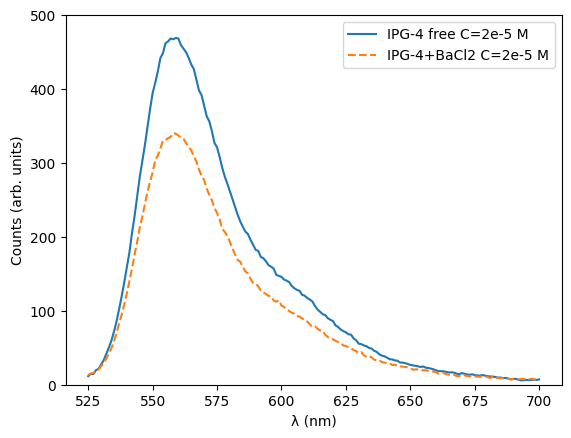

In [83]:
em_data['IPG-4_free_dissolved x2 repetition'].plot(label='IPG-4 free C=2e-5 M')
em_data['IPG-4_BaCl2 1p8e-5 '].plot(ls='--', label='IPG-4+BaCl2 C=2e-5 M')
plt.gca().set(xlabel='λ (nm)', ylabel='Counts (arb. units)', ylim=(0, 500))
plt.legend()

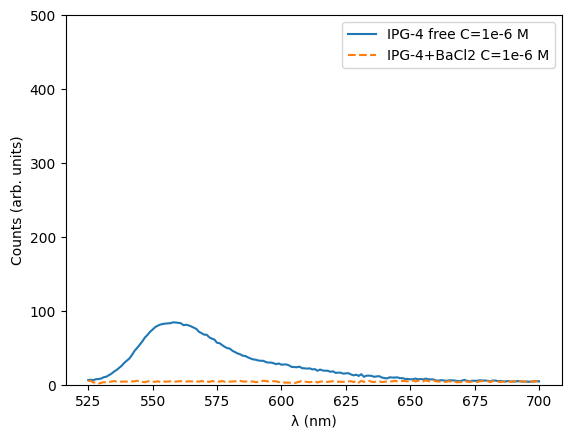

In [60]:
em_data['IPG-4_free_1e-6M_repetition'].plot(label='IPG-4 free C=1e-6 M')
em_data['IPG-4_BaCl2 1e-6'].plot(ls='--', label='IPG-4+BaCl2 C=1e-6 M')
plt.gca().set(xlabel='λ (nm)', ylabel='Counts (arb. units)', ylim=(0, 500))
plt.legend()
# em_data['IPG-4_BaCl2 1e-6 at 50nm per min_5nm bw'].plot()

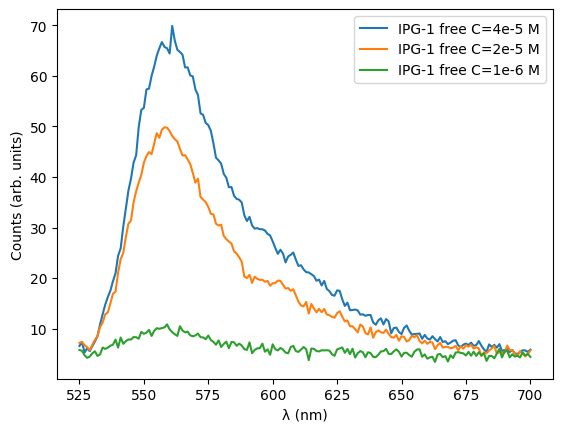

In [48]:
em_data['IPG-1_free 4e-5M'].plot(label='IPG-1 free C=4e-5 M')
# em_data[]
em_data['IPG-1_free 2e-5M'].plot(label='IPG-1 free C=2e-5 M')
em_data['IPG-1_free 1e-6M'].plot(label='IPG-1 free C=1e-6 M')
plt.gca().set(xlabel='λ (nm)', ylabel='Counts (arb. units)')
plt.legend()

[Text(0.5, 0, 'C (M)'),
 Text(0, 0.5, 'Integral curve (arb. units)'),
 None,
 None]

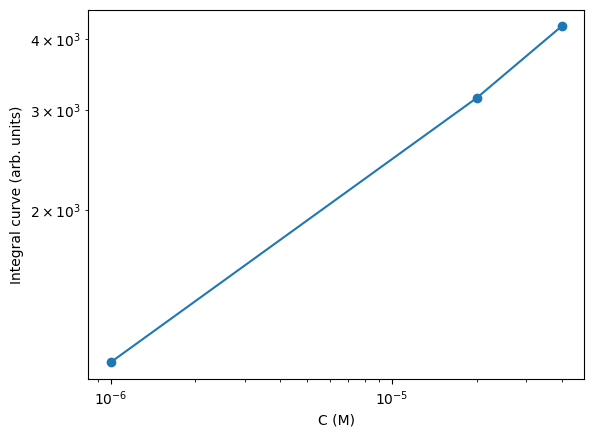

In [96]:
int_11 = em_data['IPG-1_free 4e-5M'].sum()
int_12 = em_data['IPG-1_free 2e-5M'].sum()
int_13 = em_data['IPG-1_free 1e-6M'].sum()
int_ipg1 = [int_11, int_12, int_13]
c_ipg1 = [4e-5, 2e-5, 1e-6]
plt.plot(c_ipg1, int_ipg1, 'o-')
plt.gca().set(xlabel='C (M)', ylabel = 'Integral curve (arb. units)', xscale='log', yscale='log')

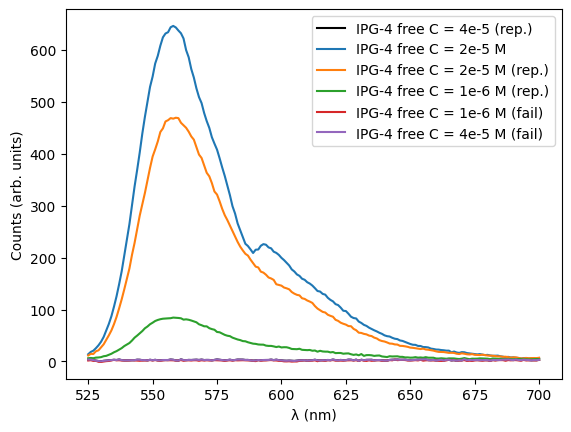

In [88]:
em_data['IPG-4_free_dissolved x2'].plot(label='IPG-4 free C = 2e-5 M')
em_data['IPG-4_free_dissolved x2 repetition'].plot(label='IPG-4 free C = 2e-5 M (rep.)')
em_data['IPG-4_free_1e-6M_repetition'].plot(label='IPG-4 free C = 1e-6 M (rep.)')
em_data['IPG-4_free_dissolved x10'].plot(label='IPG-4 free C = 1e-6 M (fail)')
em_data['IPG-4_free_orig_concent_repetition'].plot(label='IPG-4 free C = 4e-5 M (fail)' )
plt.gca().set(xlabel='λ (nm)', ylabel='Counts (arb. units)')
plt.legend()

5.076987620562114

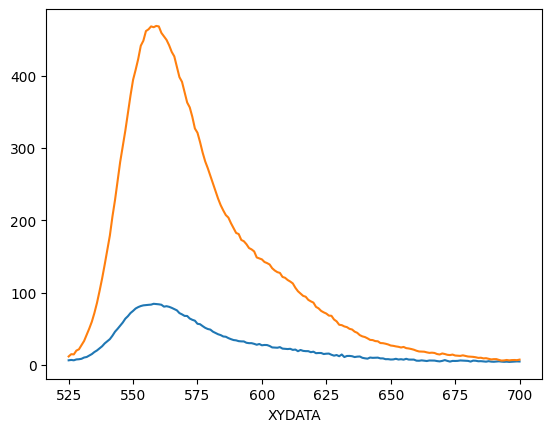

In [70]:
em_data['IPG-4_free_1e-6M_repetition'].plot(label='IPG-4 free C = 1e-6 M (rep.)')
em_data['IPG-4_free_dissolved x2 repetition'].plot(label='IPG-4 free C = 2e-5 M (rep.)')
int_6 = em_data['IPG-4_free_1e-6M_repetition'].sum()
int_5 = em_data['IPG-4_free_dissolved x2 repetition'].sum()
int_5/int_6

In [62]:
MmBa = 208.23 # g/mol
Mm4 = 1333 # g/mol
Na = 6.023e23 # molec/mol
m_ipg = 50e-6 # g

N_ipg4 = m_ipg / Mm4 * Na
n_ipg4 = m_ipg / Mm4

print(" N_0 = %.2e  IPG-2 molecules" %N_ipg4)
print(" n_0 = %.2e  mol IPG-2 " %n_ipg4)

m_Ba4 = N_ipg4 * MmBa / Na
print(" m_1:1 = %.2e g  BaCl2 " %m_Ba4)

 N_0 = 2.26e+16  IPG-2 molecules
 n_0 = 3.75e-08  mol IPG-2 
 m_1:1 = 7.81e-06 g  BaCl2 


In [108]:
m_Ba42 = 10e-3 #g (10 mg)
V0_Ba = 2e-3 # L (2 mL)

n_Ba42 = m_Ba42 / MmBa
C_Ba42 = n_Ba42 / V0_Ba
print(" C_Ba = %.2e M  " %C_Ba42)
r_IPG_Ba42 = n_Ba42/n_ipg4
print(" R IPG:Ba = 1:%.2f  " %r_IPG_Ba42)

 C_Ba = 2.40e-02 M  
 R IPG:Ba = 1:1280.32  


## Absorption

In [58]:
patha = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/absorption/11_09_2024/IPG1-4_absorption.csv'
ab_data = pd.read_csv(patha, index_col = 'XYDATA')
ab_data

,IPG-4 1e-6M repetition,IPG-4 dissolvedx2 repetition,IPG-4 dissolvedx20,IPG-4 free dissolvedx2,IPG-4 free first concentration repetition,IPG-4+BaCl2 C=1e-6,IPG1-free C=4e-5,IPG-4+BaCl C=1p8e-5,IPG1-free C=2e-5,IPG-4 free,IPG1-free C=1e-6,IPG-4 free first concentration
XYDATA,,,,,,,,,,,,
400.0,0.027110,0.164588,0.202575,0.119943,0.171271,0.235967,0.074034,0.089571,0.211784,0.120358,0.029248,0.219947
400.2,0.027799,0.163988,0.202345,0.119549,0.170986,0.236284,0.073539,0.089349,0.211864,0.120239,0.028998,0.219785
400.4,0.026268,0.163163,0.201643,0.118873,0.169845,0.235194,0.072654,0.088593,0.211070,0.119498,0.027546,0.218667
400.6,0.026995,0.163521,0.202355,0.119425,0.169954,0.235496,0.073043,0.089230,0.212301,0.119681,0.028079,0.219117
400.8,0.027645,0.163692,0.202832,0.119825,0.170710,0.236361,0.073384,0.089649,0.212940,0.120449,0.029283,0.219850
...,...,...,...,...,...,...,...,...,...,...,...,...
649.2,0.009541,0.009291,0.191842,0.003999,0.153406,0.235667,0.061692,0.011827,0.005528,0.003216,0.012193,0.183450
649.4,0.009529,0.009221,0.191834,0.003973,0.153414,0.235670,0.061670,0.011783,0.005469,0.003186,0.012193,0.183407
649.6,0.009565,0.009209,0.191859,0.004011,0.153472,0.235736,0.061694,0.011779,0.005438,0.003200,0.012236,0.183465


[Text(0.5, 0, 'λ (nm)'), Text(0, 0.5, 'Counts (arb. units)')]

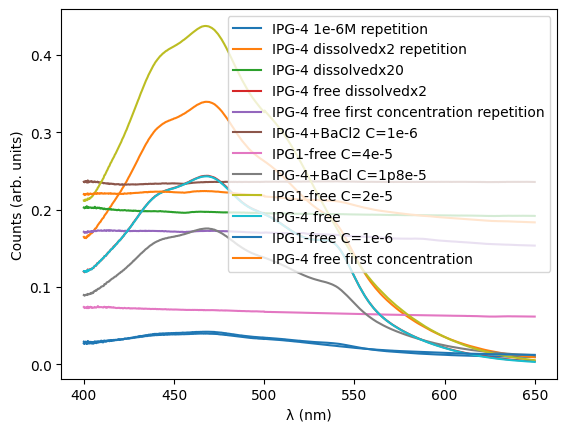

In [59]:
for col in ab_data:
    ab_data[col].plot(label=col)
plt.legend()
plt.gca().set(xlabel='λ (nm)', ylabel='Counts (arb. units)')

[Text(0.5, 0, 'λ (nm)'), Text(0, 0.5, 'Counts (arb. units)')]

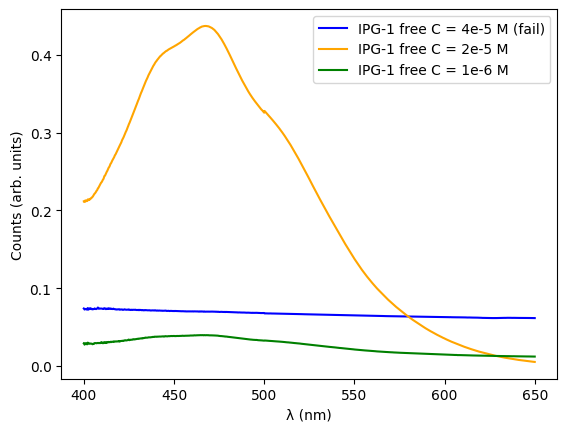

In [106]:
ab_data['IPG1-free C=4e-5'].plot(label='IPG-1 free C = 4e-5 M (fail)', color='blue')
ab_data['IPG1-free C=2e-5'].plot(label='IPG-1 free C = 2e-5 M', color='orange')
ab_data['IPG1-free C=1e-6'].plot(label='IPG-1 free C = 1e-6 M', color='g')
plt.legend()
plt.gca().set(xlabel='λ (nm)', ylabel='Counts (arb. units)')

In [107]:
1/0.05

20.0

[Text(0.5, 0, 'λ (nm)'), Text(0, 0.5, 'Counts (arb. units)')]

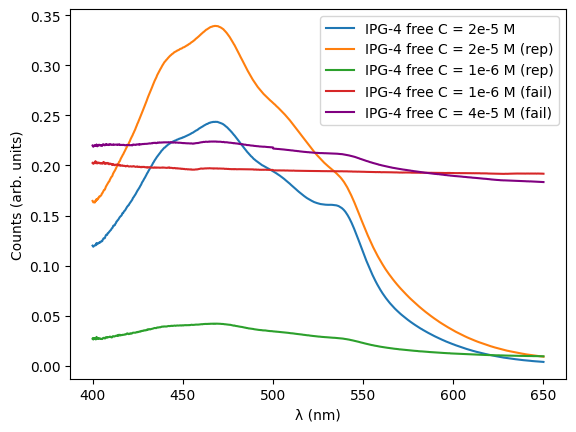

In [81]:
ab_data['IPG-4 free dissolvedx2'].plot(label='IPG-4 free C = 2e-5 M')
ab_data['IPG-4 dissolvedx2 repetition'].plot(label='IPG-4 free C = 2e-5 M (rep)')
ab_data['IPG-4 1e-6M repetition'].plot(label='IPG-4 free C = 1e-6 M (rep)')
ab_data['IPG-4 dissolvedx20'].plot(label='IPG-4 free C = 1e-6 M (fail)')
ab_data['IPG-4 free first concentration'].plot(label='IPG-4 free C = 4e-5 M (fail)', color='purple')
plt.legend()
plt.gca().set(xlabel='λ (nm)', ylabel='Counts (arb. units)')


# 16/09/2024

Repetition with IPG-4 at 0.05 M

In [145]:
pathe = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/emission/16_09_2024/*.csv'
files = glob.glob(pathe)


'IPG4 free C=0.05uM 10 accum'

In [154]:
em_data = pd.DataFrame()
for f in files:
    fdir, fname = os.path.split(f)
    meas, _ = os.path.splitext(fname)
    dftemp = pd.read_csv(f, skiprows=19, nrows=176, names=['λ (nm)', meas], index_col='λ (nm)')
    em_data[meas] = dftemp
em_data

,IPG4 free C=0.05uM 10 accum,IPG4 free C=1uM,IPG4 free C=0.05uM (rep),IPG4 C=0.05uM BaCl2 C=10mM,IPG4 BaCl2 C=0.05uM 1to1,IPG4 free C=0.05uM,IPG4 free C=1uM (bis),IPG4 C=0.05uM BaCl2 C=1uM,IPG4 C=0.05uM BaCl2 C=1mM
λ (nm),,,,,,,,,
525.0,0.741212,26.7822,2.353230,3.98204,3.64852,0.496765,NaN,5.04267,4.29291
526.0,0.140641,28.1796,2.702790,3.51000,3.70844,-1.436810,NaN,3.16756,3.86135
527.0,0.980976,27.7196,3.555110,5.30338,3.36557,-0.049847,NaN,5.09551,4.59856
528.0,0.509493,29.3598,2.016060,3.14785,3.20578,-0.577604,NaN,3.75097,2.97699
529.0,-0.460225,29.7023,0.805583,3.27020,0.73212,-1.059670,NaN,2.78501,2.57684
...,...,...,...,...,...,...,...,...,...
696.0,1.429570,26.5717,3.495480,4.84302,4.54684,-0.827795,26.3469,3.87543,4.87827
697.0,1.714570,26.3839,4.130170,5.08490,3.69407,-0.124904,26.5861,4.13048,4.26743
698.0,0.890415,26.3299,3.433710,4.86718,3.55870,-0.378002,26.4405,3.70746,3.96121


<Axes: xlabel='λ (nm)'>

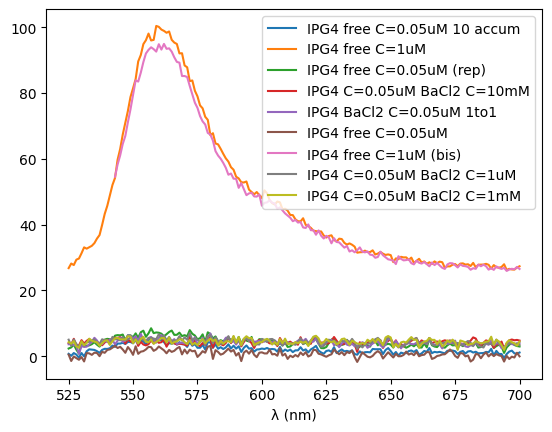

In [155]:
em_data.plot()

# 24/09/2024

Repetition with IPG-4 at 0.5 µM

In [167]:
pathe = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/emission/24Sep/*.csv'
files = glob.glob(pathe)
files.sort()
files

['/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/emission/24Sep/IPG-4_0.5uM+BaCl2_0.5mM.csv',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/emission/24Sep/IPG-4_0.5uM+BaCl2_1.5mM.csv',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/emission/24Sep/IPG-4_0.5uM+BaCl2_1mM.csv',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/emission/24Sep/IPG-4_0.5uM+BaCl2_7.5mM.csv',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/emission/24Sep/IPG-4_free_0.5uM (rep).csv',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/emission/24Sep/IPG-4_free_0.5uM.csv']

In [168]:
em_data = pd.DataFrame()
for f in files:
    fdir, fname = os.path.split(f)
    meas, _ = os.path.splitext(fname)
    dftemp = pd.read_csv(f, skiprows=19, nrows=176, names=['λ (nm)', meas], index_col='λ (nm)')
    em_data[meas] = dftemp
em_data

,IPG-4_0.5uM+BaCl2_0.5mM,IPG-4_0.5uM+BaCl2_1.5mM,IPG-4_0.5uM+BaCl2_1mM,IPG-4_0.5uM+BaCl2_7.5mM,IPG-4_free_0.5uM (rep),IPG-4_free_0.5uM
λ (nm),,,,,,
525.0,-13.1900,-8.19659,-11.30900,-10.18200,-5.44057,-15.3743
526.0,-11.3997,-6.89412,-10.22500,-8.05643,-5.73319,-13.0300
527.0,-12.1995,-6.70228,-10.33700,-8.14810,-5.37107,-13.2705
528.0,-11.3341,-6.74978,-9.39607,-8.49859,-5.57422,-13.9711
529.0,-11.1004,-7.07247,-9.60425,-8.42987,-4.23092,-14.2070
...,...,...,...,...,...,...
696.0,-12.7322,-7.81507,-9.57239,-8.74061,-6.16861,-13.9327
697.0,-11.6615,-7.38102,-9.47085,-8.29914,-5.29709,-13.1130
698.0,-12.6754,-8.39441,-10.86070,-8.82205,-6.46424,-13.9373


<Axes: xlabel='λ (nm)'>

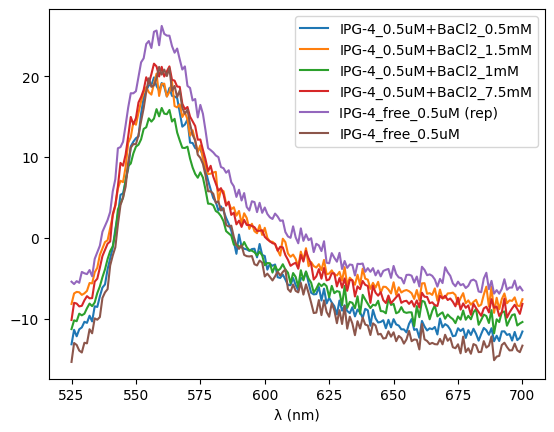

In [169]:
em_data.plot()

### Absorption

In [170]:
patha = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/absorption/24Sep/*.csv'
filesa = glob.glob(patha)
filesa.sort()
filesa

['/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/absorption/24Sep/IPG4_0.5uM+BaCl2_0.5mM (rep).csv',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/absorption/24Sep/IPG4_0.5uM+BaCl2_0.5mM+2mg.csv',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/absorption/24Sep/IPG4_0.5uM+BaCl2_0.5mM.csv',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/absorption/24Sep/IPG4_0.5uM+BaCl2_1mM.csv',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/absorption/24Sep/IPG4_0.5uM+BaCl2_7.5mM.csv',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/spectra/absorption/24Sep/IPG4_0.5uM+free.csv']

In [174]:
ab_data = pd.DataFrame()
for f in filesa:
    fdir, fname = os.path.split(f)
    meas, _ = os.path.splitext(fname)
    dftemp = pd.read_csv(f, skiprows=19, nrows=176, names=['λ (nm)', meas], index_col='λ (nm)')
    ab_data[meas] = dftemp
ab_data

,IPG4_0.5uM+BaCl2_0.5mM (rep),IPG4_0.5uM+BaCl2_0.5mM+2mg,IPG4_0.5uM+BaCl2_0.5mM,IPG4_0.5uM+BaCl2_1mM,IPG4_0.5uM+BaCl2_7.5mM,IPG4_0.5uM+free
λ (nm),,,,,,
650.0,0.008971,0.149890,0.097271,0.021549,0.021549,-0.031120
649.8,0.009023,0.149882,0.097311,0.021557,0.021557,-0.031077
649.6,0.009046,0.149934,0.097318,0.021576,0.021576,-0.031033
649.4,0.009022,0.149987,0.097322,0.021610,0.021610,-0.030991
649.2,0.009043,0.150016,0.097348,0.021639,0.021639,-0.030952
...,...,...,...,...,...,...
615.8,0.014348,0.154688,0.102286,0.026255,0.026255,-0.025623
615.6,0.014333,0.154746,0.102297,0.026264,0.026264,-0.025596
615.4,0.014350,0.154779,0.102307,0.026331,0.026331,-0.025578


<Axes: xlabel='λ (nm)'>

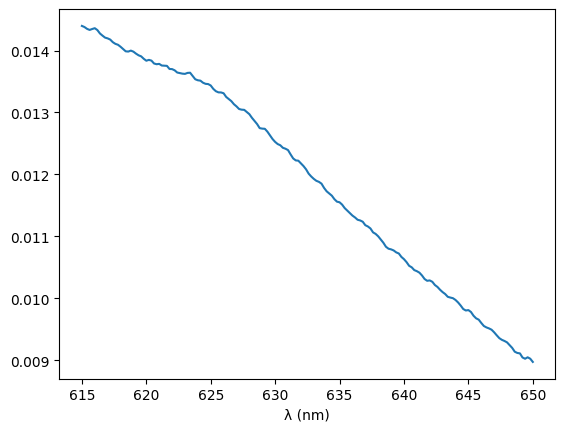

In [180]:
ab_data['IPG4_0.5uM+BaCl2_0.5mM (rep)'].plot()